In [52]:
dataset_dir

'C:\\Users\\isaacg\\Phone-detection--2'

Ignoring unsupported parameter 'overwrite' for importer type <class 'fiftyone.utils.yolo.YOLOv5DatasetImporter'>
 100% |█████████████████████| 0/0 [17.5ms elapsed, ? remaining, ? samples/s] 
Ignoring unsupported parameter 'overwrite' for importer type <class 'fiftyone.utils.yolo.YOLOv5DatasetImporter'>
 100% |█████████████████| 200/200 [2.0s elapsed, 0s remaining, 116.0 samples/s]     
Name:        phone-dataset
Media type:  image
Num samples: 200
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.lab


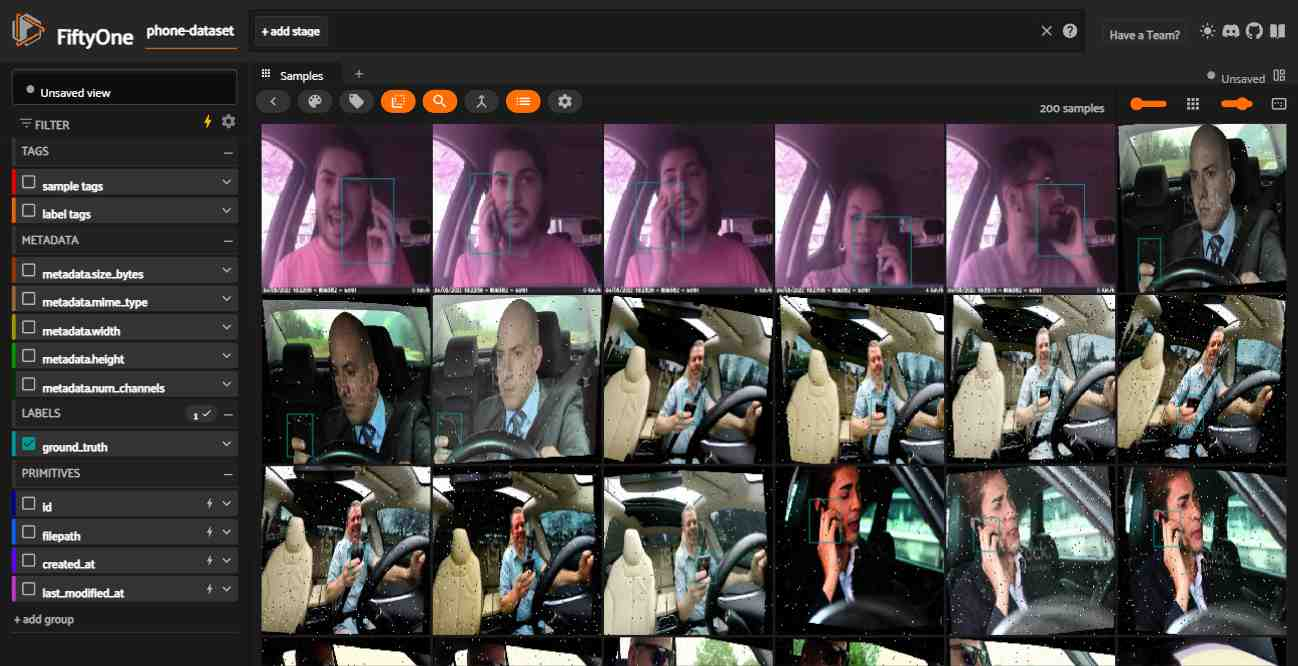

In [77]:
import fiftyone as fo

name = "phone-dataset"

dataset_dir ="C:\\Users\\isaacg\\Desktop\\voxel51_Hackathon\\phone_dataset\\"

# The splits to load
splits = ["train", "test"]

# Load the dataset, using tags to mark the samples in each split
dataset = fo.Dataset(name, overwrite=True)
for split in splits:
    dataset.add_dir(
        dataset_dir=dataset_dir,
        dataset_type=fo.types.YOLOv5Dataset,
        split=split,
        tags=split,
        yaml_path="dataset.yaml",
        overwrite=True
        
)

# View summary info about the dataset
print(dataset)

# Print the first few samples in the dataset
print(dataset.head())
# Launch FiftyOne
session = fo.launch_app(phone_dataset)


 100% |███████████████| 5859/5859 [11.9s elapsed, 0s remaining, 539.2 samples/s]      



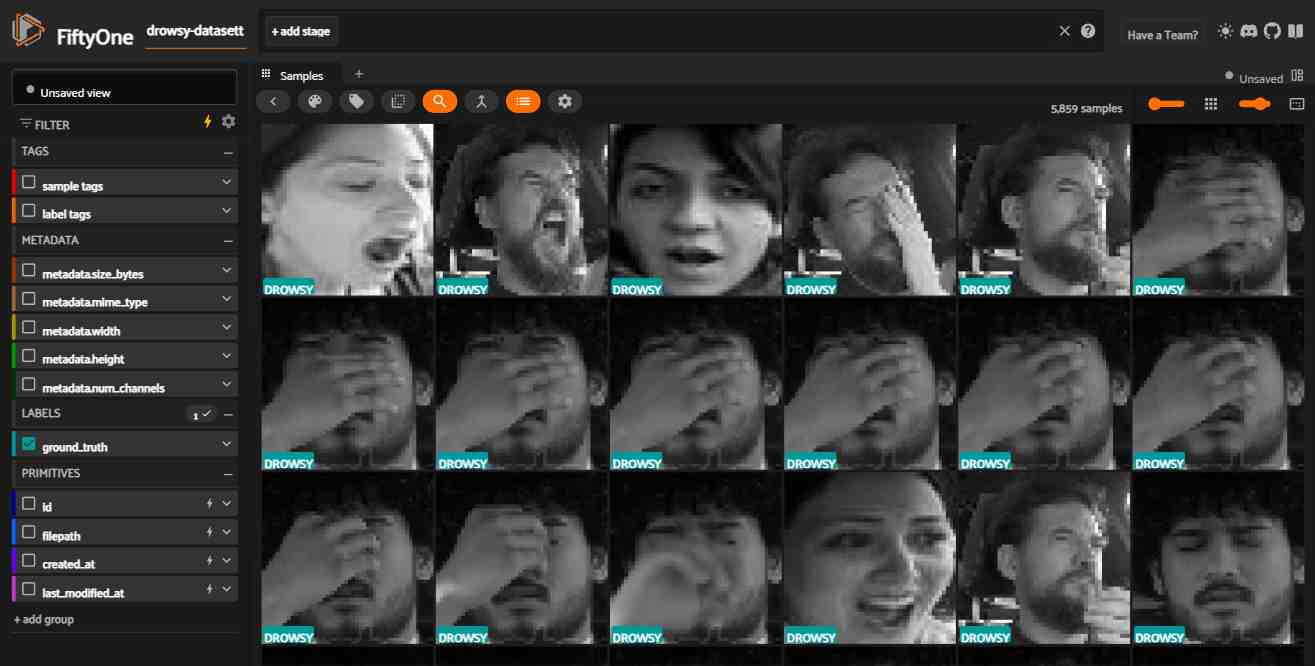

In [84]:
import fiftyone as fo


name = "drowsy-datasett"
dataset_dir =r"C:\Users\isaacg\Desktop\voxel51_Hackathon\Drowsy_datset\train"

# Create the dataset
drowsy_dataset = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    name=name,
    overwrite=True
)
# Launch FiftyOne
session = fo.launch_app(drowsy_dataset)


In [104]:
# Create a FiftyOne dataset and add both sets of samples
merged_dataset = fo.Dataset(name="drowsy_phone_dataset",overwrite=True)
merged_dataset.add_samples(drowsy_dataset)
merged_dataset.add_samples(phone_dataset)


# Launch FiftyOne to view both datasets together
session = fo.launch_app(merged_dataset)

 100% |███████████████| 5859/5859 [24.4s elapsed, 0s remaining, 267.4 samples/s]      
 100% |███████████████| 6059/6059 [29.6s elapsed, 0s remaining, 225.1 samples/s]      


In [92]:
pip install "ultralytics>=8.1.0" "torch>=1.8"


   ---------------------------------------- 0.0/922.6 kB ? eta -:--:--
   ---------------------------------------- 922.6/922.6 kB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
    --------------------------------------- 3.9/204.1 MB 19.5 MB/s eta 0:00:11
   - -------------------------------------- 7.9/204.1 MB 18.7 MB/s eta 0:00:11
   -- ------------------------------------- 11.3/204.1 MB 18.0 MB/s eta 0:00:11
   -- ------------------------------------- 13.4/204.1 MB 15.8 MB/s eta 0:00:13
   -- ------------------------------------- 15.2/204.1 MB 14.3 MB/s eta 0:00:14
   --- ------------------------------------ 17.3/204.1 MB 13.3 MB/s eta 0:00:15
   --- ------------------------------------ 19.4/204.1 MB 12.9 MB/s eta 0:00:15
   ---- ----------------------------------- 21.5/204.1 MB 12.4 MB/s eta 0:00:15
   ---- ----------------------------------- 23.9/204.1 MB 12.1 MB/s eta 0:00:15
   ----- ---------------------------------- 26.0/204.1 MB 1

In [105]:
# Suppress Ultralytics logging
import os; os.environ["YOLO_VERBOSE"] = "False"
import fiftyone.zoo as foz
import fiftyone.utils.ultralytics as fou
import fiftyone.utils.ultralytics as fou

from ultralytics import YOLO

# Load an example dataset
dataset = fo.Dataset("merged-dataset")
dataset.select_fields().keep_fields()

In [ ]:
# YOLOv8
model = YOLO("yolov8n-cls.pt")
# model = YOLO("yolov8s-cls.pt")
# model = YOLO("yolov8m-cls.pt")
# model = YOLO("yolov8l-cls.pt")
# model = YOLO("yolov8x-cls.pt")

merged_dataset.apply_model(model, label_field="classif")

session = fo.launch_app(merged_dataset)

   5% |/------------|   541/11918 [8.2m elapsed, 3.0h remaining, 0.7 samples/s]  

# 🚀 **Next Steps: Improving Drowsiness & Phone Detection Model**
🔹 **Goal:** Enhance the trained YOLOv5 model to not only detect **drowsiness & phone usage** but also track **how long** they occur and trigger a **real-time car alert system**.

---

## **🛠️ Step 1: Fine-Tune & Retrain YOLOv5**
🔹 **Refine the dataset** by improving bounding box accuracy  
🔹 **Increase training epochs** for better generalization  
🔹 **Use YOLOv5m or YOLOv5l** (larger models for higher accuracy)  

### **Training Command:**
```bash
python train.py --img 640 --batch 16 --epochs 100 --data yolo_dataset/data.yaml --weights yolov5m.pt --device 0
📌 Expected Outcome: Higher detection accuracy for both drowsiness & phone usage.

📊 Step 2: Create Python Script to Track Duration
🔹 Measure how long a person is drowsy (closed eyes detected)
🔹 Measure how long a phone is being used while driving
🔹 Store detection times in a log file

Implementation Approach:
1️⃣ Track detections over time (frame-by-frame analysis)
2️⃣ Use a timer to accumulate duration for each detection
3️⃣ Store results in a log file or database

Python Code Snippet:
python
Copy
Edit
import time
import cv2
from ultralytics import YOLO

# Load trained model
model = YOLO("yolov5/runs/train/exp/weights/best.pt")

# Initialize timers
start_time_drowsy = None
start_time_phone = None

# Video Capture
cap = cv2.VideoCapture(0)  # Use webcam or video input

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv5 inference
    results = model.predict(source=frame)

    # Check for detections
    detections = results.pandas().xyxy[0]
    is_drowsy = any(detections["name"] == "drowsy")
    is_using_phone = any(detections["name"] == "phone")

    # Track drowsiness duration
    if is_drowsy:
        if start_time_drowsy is None:
            start_time_drowsy = time.time()
    else:
        if start_time_drowsy is not None:
            duration = time.time() - start_time_drowsy
            print(f"Drowsiness detected for {duration:.2f} seconds")
            start_time_drowsy = None  # Reset timer

    # Track phone usage duration
    if is_using_phone:
        if start_time_phone is None:
            start_time_phone = time.time()
    else:
        if start_time_phone is not None:
            duration = time.time() - start_time_phone
            print(f"Phone usage detected for {duration:.2f} seconds")
            start_time_phone = None  # Reset timer

cap.release()
cv2.destroyAllWindows()
📌 Expected Outcome: The script logs how long a driver is drowsy or using a phone.

🚗 Step 3: Integrate Car Alerts (Horn, Hazard Lights, Radio)
🔹 Trigger horn if the driver is on the phone too long 📱📢
🔹 Blink hazard lights or play a loud sound if drowsy 🚨😴
🔹 Wire detection to the car's electrical system (Raspberry Pi/Arduino)

Hardware Requirements
Raspberry Pi / Arduino to control alerts
Relay module to activate horn, radio, or hazard lights
CAN Bus Module to communicate with the car
Python Code for Raspberry Pi GPIO Alerts
python
Copy
Edit
import RPi.GPIO as GPIO
import time

# Define GPIO Pins for alerts
HORN_PIN = 17
HAZARD_LIGHTS_PIN = 27
RADIO_ALERT_PIN = 22

# Set up GPIO
GPIO.setmode(GPIO.BCM)
GPIO.setup(HORN_PIN, GPIO.OUT)
GPIO.setup(HAZARD_LIGHTS_PIN, GPIO.OUT)
GPIO.setup(RADIO_ALERT_PIN, GPIO.OUT)

def alert_drowsiness():
    print("⚠️ Drowsiness detected! Activating hazard lights...")
    GPIO.output(HAZARD_LIGHTS_PIN, GPIO.HIGH)
    time.sleep(5)  # Keep lights on for 5 seconds
    GPIO.output(HAZARD_LIGHTS_PIN, GPIO.LOW)

def alert_phone_usage():
    print("⚠️ Phone detected! Activating horn...")
    GPIO.output(HORN_PIN, GPIO.HIGH)
    time.sleep(1)  # Beep horn for 1 second
    GPIO.output(HORN_PIN, GPIO.LOW)

# Example: Trigger alerts
alert_drowsiness()
alert_phone_usage()

GPIO.cleanup()
📌 Expected Outcome: If drowsy, hazard lights blink. If using a phone, horn beeps.

🎯 Final Steps
🔹 ✅ Test the tracking script & ensure detections are accurate
🔹 ✅ Integrate with Raspberry Pi for real-time alerts
🔹 ✅ Optimize alert triggers to prevent false alarms
🔹 ✅ Deploy & test the system in a real car setup

🚀 Conclusion
✅ We trained YOLOv5 for detecting drowsiness & phone usage
✅ We tracked how long these events happen using a Python script
✅ We designed an alert system to notify the driver in real-time
✅ Next, we integrate everything into a real car! 🚗💨

🔗 GitHub Repo: [Add Your Link Here]
📨 Contact: [Your Name & Email]

🚀 Let's make driving safer with AI!

yaml
Copy
Edit

---

## **🔥 Next Steps**
- Do you want a **Jupyter Notebook version** of this?
- Would you like **help setting up Raspberry Pi wiring** for the alerts?

Let me know how you'd like to proceed! 🚀

In [ ]:
classification model and image detectin model 